In [6]:
!pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# dataset api
!kaggle competitions download -c cifar-10

 98% 704M/715M [00:04<00:00, 47.8MB/s]
100% 715M/715M [00:04<00:00, 178MB/s] 


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 9.5 MB/s eta 0:00:00


In [13]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()   #archive.extractall(path-/content/Training Data)
archive.close()


In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies


In [15]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [16]:
filename=os.listdir('/content/train')


In [17]:
type(filename)

list

In [18]:
len(filename)

50000

In [19]:
print(filename[0:5])
print(filename[-5:])

['12139.png', '10681.png', '42195.png', '9984.png', '11546.png']
['43596.png', '23063.png', '21494.png', '21764.png', '13397.png']


**Labels Processing**

In [20]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [21]:
labels_df.shape

(50000, 2)

In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [24]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [25]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [26]:
labels_dictionary={'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9 }

labels=[labels_dictionary[i] for i in labels_df['label']]

In [27]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


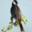

In [28]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread("/content/train/31439.png")
cv2_imshow(img)

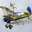

In [29]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread("/content/train/2634.png")
cv2_imshow(img)

In [30]:
labels_df[labels_df['id']==31439]

,id,label
31438,31439,bird


In [31]:
labels_df[labels_df['id']==2634]

,id,label
2633,2634,airplane


In [32]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [33]:
id_list=list(labels_df['id'])

In [34]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [35]:
#convert images into numpy array

train_data_folder='/content/train/'

data=[]

for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [36]:
type(data)

list

In [37]:
len(data)

50000

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(32, 32, 3)

In [40]:
print(data[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [41]:
# convert images list and labels list to numpy array
X=np.array(data)
Y=np.array(labels)

In [42]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test split

In [50]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [52]:
# SCALING THE DATA
X_train_scaled=X_train/255


X_test_scaled=X_test/255


In [53]:
print(X_train_scaled)



[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building the neural network**

In [55]:
import tensorflow as tf
from tensorflow import keras


In [56]:
num_of_classes=10

#setting up the layers of Neural Network

model=keras.Sequential([

                        keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(64, activation='relu'),
                        keras.layers.Dense(num_of_classes, activation='softmax'),

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [64]:
#training the neural network

model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10 )

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.2611 - loss: 2.0556 - val_acc: 0.3458 - val_loss: 1.8005
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3480 - loss: 1.8020 - val_acc: 0.3728 - val_loss: 1.7415
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3674 - loss: 1.7547 - val_acc: 0.3767 - val_loss: 1.7086
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3817 - loss: 1.7134 - val_acc: 0.3817 - val_loss: 1.7108
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3895 - loss: 1.6924 - val_acc: 0.3943 - val_loss: 1.6764
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3947 - loss: 1.6763 - val_acc: 0.4033 - val_loss: 1.6365
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3971 - loss: 1.6643 - val_acc: 0.3925 - val_loss: 1.6681
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.4128 - loss: 1.6404 - val_acc: 0.4083 - val_loss: 1.6427
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

RestNet50

In [74]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [75]:
convolutional_base=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [80]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [83]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-05), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history=model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
   5/1125 ━━━━━━━━━━━━━━━━━━━━ 13:25:12 43s/step - acc: 0.0706 - loss: 2.9516

In [ ]:
h=history
#plot loss function value

plt.plot(h.history['loss'], lable='train_loss' )
plt.plot(h.history['val_loss'], lable='validation_loss' )
#plot loss function value

plt.plot(h.history['acc'], lable='train_accuracy' )
plt.plot(h.history['val_acc'], lable='validation_accuracy' )
plt.legend()
plt.show()